<a href="https://colab.research.google.com/github/pablarce/parcial-ia/blob/main/ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

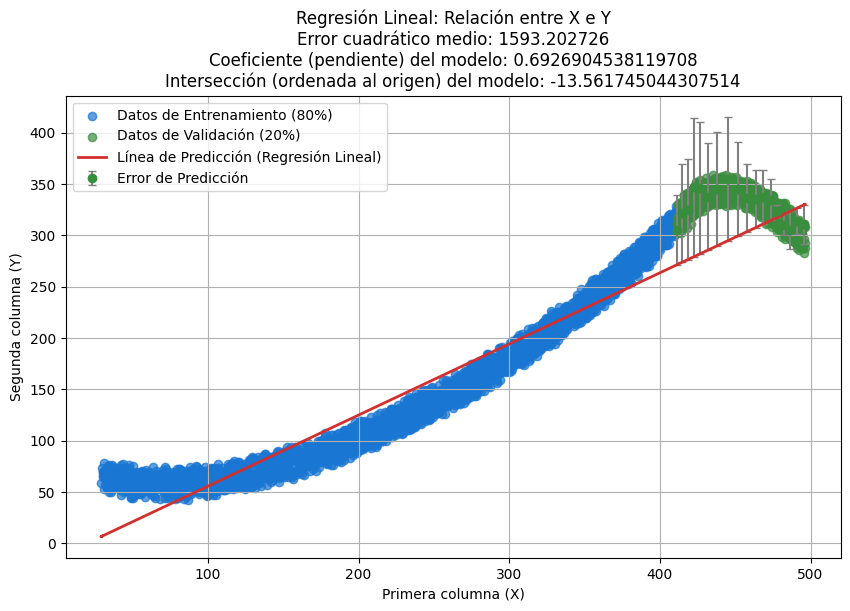

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

data = pd.read_csv('/content/drive/MyDrive/INTELIGENCIA ARTIFICIAL/dataEJ01.csv')

X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values

split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(10, 6))

plt.scatter(X_train, y_train, color='#1976D2', label='Datos de Entrenamiento (80%)', alpha=0.7)

plt.scatter(X_test, y_test, color='#388E3C', label='Datos de Validación (20%)', alpha=0.7)

indices_error = np.arange(0, len(X_test), 35)
plt.errorbar(X_test[indices_error].flatten(), y_test[indices_error], yerr=np.abs(y_test[indices_error] - y_pred[indices_error]),
             fmt='o', color='#388E3C', ecolor='gray', capsize=3, label='Error de Predicción')

y_model = model.predict(X)
plt.plot(X, y_model, color='#D32F2F', label='Línea de Predicción (Regresión Lineal)', linewidth=2)

# Añadir etiquetas y leyenda
plt.xlabel("Primera columna (X)")
plt.ylabel("Segunda columna (Y)")
plt.title(f"Regresión Lineal: Relación entre X e Y\nError cuadrático medio: {mse:.6f}\nCoeficiente (pendiente) del modelo: {model.coef_[0]}\nIntersección (ordenada al origen) del modelo: {model.intercept_}")

# Mostrar la leyenda y la cuadrícula
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


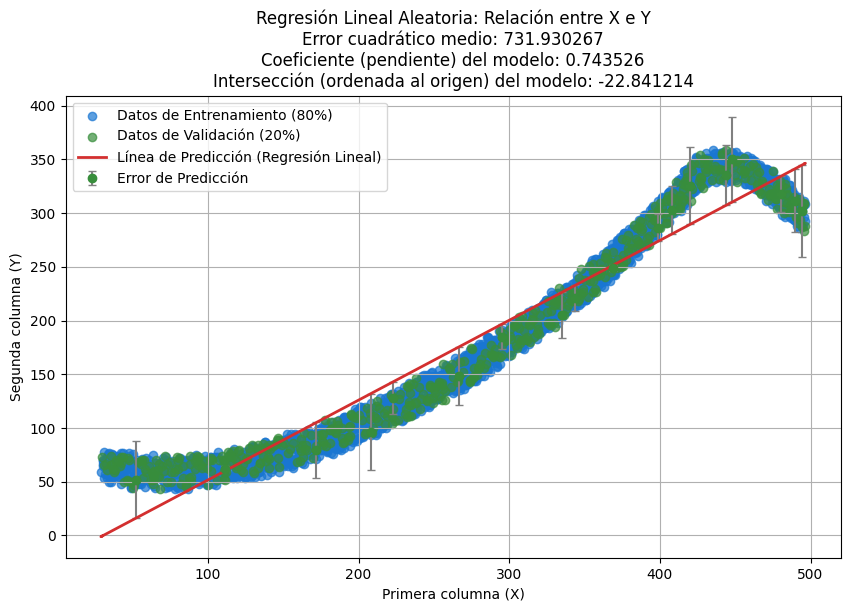

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive

data = pd.read_csv('/content/drive/MyDrive/INTELIGENCIA ARTIFICIAL/dataEJ01.csv')

X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values

X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X, y, test_size=0.2, random_state=42)

model_rand = LinearRegression()
model_rand.fit(X_train_rand, y_train_rand)

y_pred_rand = model_rand.predict(X_test_rand)

mse_rand = mean_squared_error(y_test_rand, y_pred_rand)

coef_rand = model_rand.coef_[0]
intercept_rand = model_rand.intercept_

plt.figure(figsize=(10, 6))

plt.scatter(X_train_rand, y_train_rand, color='#1976D2', label='Datos de Entrenamiento (80%)', alpha=0.7)
plt.scatter(X_test_rand, y_test_rand, color='#388E3C', label='Datos de Validación (20%)', alpha=0.7)


indices_error_rand = np.arange(0, len(X_test_rand), 35)
plt.errorbar(X_test_rand[indices_error_rand].flatten(), y_test_rand[indices_error_rand],
             yerr=np.abs(y_test_rand[indices_error_rand] - y_pred_rand[indices_error_rand]),
             fmt='o', color='#388E3C', ecolor='gray', capsize=3, label='Error de Predicción')

y_model_rand = model_rand.predict(X)
plt.plot(X, y_model_rand, color='#D32F2F', label='Línea de Predicción (Regresión Lineal)', linewidth=2)

plt.xlabel("Primera columna (X)")
plt.ylabel("Segunda columna (Y)")
plt.title(f"Regresión Lineal Aleatoria: Relación entre X e Y\nError cuadrático medio: {mse_rand:.6f}\nCoeficiente (pendiente) del modelo: {coef_rand:.6f}\nIntersección (ordenada al origen) del modelo: {intercept_rand:.6f}")

plt.legend()
plt.grid(True)

plt.show()


<hr/>

## Comparación por MSE e Iterseccion

**Error Cuadrático Medio (MSE)**
- En el modelo (a), el MSE es de 1593.20.
- En el modelo (b), es de 731.93, mucho más bajo, lo que muestra que predice mejor los valores de validación. La diferencia probablemente se debe a cómo se dividieron los datos para entrenar y validar el modelo:
  - En el modelo (a), se usaron los primeros 80% de los datos, lo que puede introducir sesgo si estos siguen algún orden o tendencia.
  - En el modelo (b), la selección aleatoria de datos equilibra mejor el entrenamiento y validación, y eso puede mejorar la precisión.

**Coeficiente y Punto de Intersección**
  - El modelo (a) tiene un coeficiente de alrededor de 0.693 y una intersección de -13.56.
  - El modelo (b) tiene un coeficiente de aproximadamente 0.744 e intersección de -22.84.
   
  Ambos modelos tienen pendientes parecidas, pero el modelo (b) tiene un coeficiente ligeramente mayor, lo que sugiere que al usar datos aleatorios capturó mejor la relación entre las variables.
<br/>

El modelo (b) parece ser la mejor opción ya que tiene un error menor, lo que significa que representa mejor la relación en el conjunto de datos. Como divide los datos de forma aleatoria, es menos probable que esté sesgado y tiene mayor capacidad para generalizar si los datos no son uniformes.